# Fénysebesség mérése
## 1. feladat: Ismerkedés a mérési elrendezéssel
Állítsa össze a mérési elrendezést! 
Ügyeljen arra, hogy a fényforrás és a detektor közti a fényút akadálymentes legyen.
Az oszcilloszkópon folyamatosan mérve győződjön meg arról, hogy a detektált jel feszültsége ne haladja meg a 0,7 Voltot! 
*Javaslat,* a mérés során az oszcilloszkópon a 20 ns/osztás (kalibrált) időzítési állást használja, ezzel végrehajtható az összes mérési lépés.

Jellemezze az oszcilloszkópon mért jelalakokat egy tetszőlegesen választott tükörállás mellett!


**Itt a helye a jellemzésnek**

* jelalak kvalitatív jellemzése
* leolvasott jellemzői és a leolvasási hiba

Az impulzusgenerátor jele keskeny, gyorsan felfutó és lefutó élekkel Lorentz-görbére emlékeztet. A detektált jel jóval szélesebb, az előzőhöz hasonló felfutó, azonban exponenciáls lefutó éllel rendelkezik. Utóbbi magassága kb. fele akkora.

Az első leolvasási hibája emiatt alacsony, könnyű megkülönböztetni a jel elejétés végét, a detektálté viszont nehézkes a 0 szinthez hozzásimuló él miatt.

## 2. feladat: A fénysebesség mérése
Mérje meg az egyes tükörállásoknak megfelelő, az amplitúdó félmagasságában mért időkülönbségeket a jeladó és a jeldetektor jelei között!
Mérje meg az időkülönbséget akkor is, ha a detektort egy rövid fényútnak megfelelő tükörpár köti össze az adóval. 
Az egyes tükörállásoknak megfelelő teljes fényút hosszokat, illetve a mért időkülönbségeket gyűjtse táblázatba.
*Megjegyzés:* a laboratórium falain finom távolságjelzések találhatók, melyek segítik az optikai úthossz megállapítását.

Milyen hibák terhelik a mérési adatokat? Becsülje meg a mérési adatok hibáját!

Ábrázolja a mért adatokat és illesztés segítségével határozza meg a fénysebességet empirikus értékét, illetve az elektronika saját késleltetését!

|Mérési pont | fényút [*m*] | időkülönbség [*ns*] |
|------------|--------------|---------------------|
|1  |  9.06 | 12 |
|2  |  12.54 | 18 |
|3  |  16.84 | 20 |
|4  |  0.97 | 6 |
|5  |  25.9 | ? |


In [35]:
#%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
# adatrögzítés, ábrázolás és illesztés

In [15]:
sns.set(style='whitegrid')

In [13]:
distances = np.sort(np.array((9.06,12.54,16.85,0.97)))
times = np.sort(np.array((12,18,20,6)))

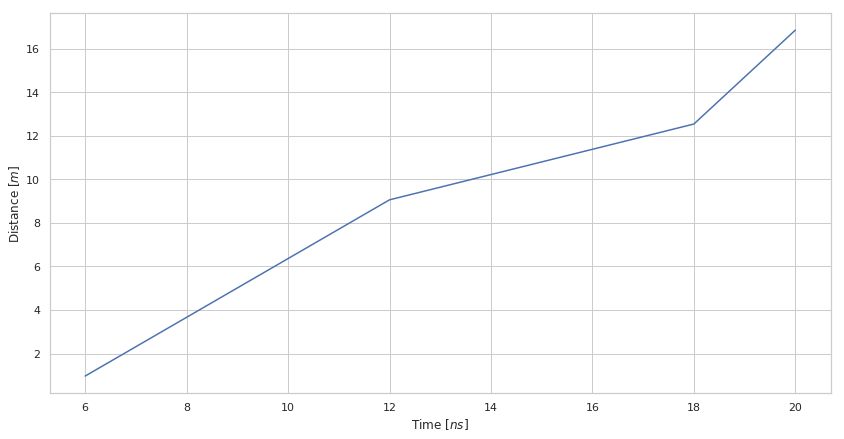

In [23]:
fig, axes = plt.subplots(figsize=(14,7))

axes.plot(times,distances)

axes.set_xlabel("Time [$ns$]")
axes.set_ylabel("Distance [$m$]")

plt.show()

In [45]:
slope, intercept, r_value, p_value, std_err = stats.linregress(times,distances)
print("Slope: {0}\nIntercept: {1}\nError: {2}".format(slope, intercept, std_err))

Slope: 1.0448333333333333
Intercept: -4.772666666666666
Error: 0.1401382749683725


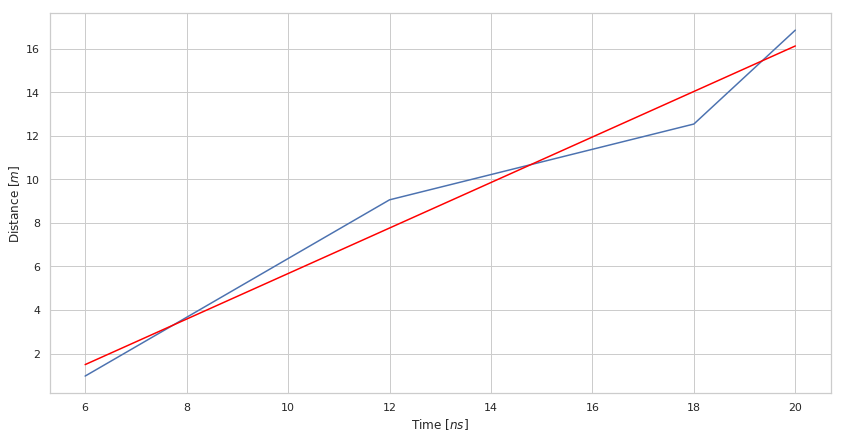

In [46]:
fig, axes = plt.subplots(figsize=(14,7))

axes.plot(times,distances)
axes.plot(times, intercept + slope*times, c='red')

axes.set_xlabel("Time [$ns$]")
axes.set_ylabel("Distance [$m$]")

plt.show()

A becsült fénysebesség hibával: $1.045 \pm 0.140\ \frac{m}{ns} = \left( 1.045 \pm 0.140 \right) \cdot 10^{9}\ \frac{m}{s}$.

Az elektronika becsült késleltetése: $4.773 \pm XXX\ ns$

## 3. feladat: Az üvegszál vizsgálata

<font color="red">**Figyelem:** a feladatban használt optikai szál nagyon régi, a korábbi évek során elszenvedett mechanikai hatásokat megszenvedte, így a tovaterjedő jel nehezen mérhető rajta, sok türelmet igényel! Javaslat, hogy ezt a feladatot csak a labor végén végezze el!</font>

Mérje meg a fényvezető kábelen a jel terjedési idejét, és ez alapján becsülje meg az üvegszálnak a törésmutatóját!

A kábel hossza $20.06\ m$.

A mért jelterjedési idő $14 \pm 0.08\ ns$.

Ez alapján a fény terjedési sebessége $\frac{20.06 \pm 0.005}{14 \pm 0.08}\ \frac{m}{ns} = 1.433 \pm 0.008\ \frac{m}{ns}$

Ez alapján a fényvezető szál becsült törésmutatója $n = \frac{c}{c_1} = 2.093 \pm 0.012$

## 4. feladat: Jelterjedés vizsgálata koaxiális kábelben

Mérje meg az elektronikus jelek terjedési sebességét a koaxiális kábelen!

A kábel hossza $19,2\ m$

A mért propagációs idő $20 \pm 0.5\ ns$

Ez alapján a jelek terjedési sebessége a koaxiális kábelen $\frac{19.2 \cdot 2}{20\pm 0.5}\ \frac{m}{ns} = 1.92 \pm 0.048\ \frac{m}{ns}$, ami a fény vákuumbeli segességének körülbelül $0.64 \pm 0.016$ szorosa.

### Visszaverődések vizsgálata koaxiális kábelben
Ha a koaxiális kábel csatlakozási pontjai nincsenek helyesen *lezárva*, akkor a rajta átvezetett jel formája torzul a visszaverődések miatt.
Mérje meg a vezeték bemenő oldalán a gerjesztés amplitudójának valamint a visszavert jel amlitudojának nagyságának arányát különböző lezáró ellenállásérték megválasztása mellett!
Ehhez kapcsolja a koaxiális kábel végére a mérőhelyen elhelyezett ellenállássort.

<img src="ellenallassor.svg" alt="R=10,33,51,220,510">

A lezáró ellenállás aktuális értékét úgy állíthatja be, hogy az ellenállások mellett található söntölő kapcsolókat (*jumperek*) lehúzza. Így a lehetséges ellenálláskombinációk széles skáláját elő tudja állítani.

Az adatokból illesztés segítségével állapítsa meg a kábel hullámellenállását és a veszteségi tényezőt! 
*Javaslat:* az adatok ábrázolásánál érdemes a vízszintes tengelyt logaritmikusra választani.
Ábrázolja az adatokat és illesszen rájuk egy alkalmas fügvényt.

|Mérés száma | Lezáró ellenállás [ $\Omega$ ] | Amplitúdóarány |
|------------|--------------------------------|----------------|
|1 | $0$ | $-16,5/20$ |
|2 | $33$ | $-4/20$ |
|3 | $94$ | $4.5/20$ |
|4 | $220$ | $11/20$ |
|5 | $314$ | $12.5/20$ |
|6 | $510$ | $14/20$ |
|7 | $730$ | $15/20$ |
|8 | $824$ | $15.5/20$ |

In [65]:
# adatrögzítés, ábrázolás és illesztés

In [79]:
ohms = np.array((0.0001,33,94,220,314,510,730,824))
amplits = np.array((-16.5,-4,4.5,11,12.5,14,15,15.5))/20

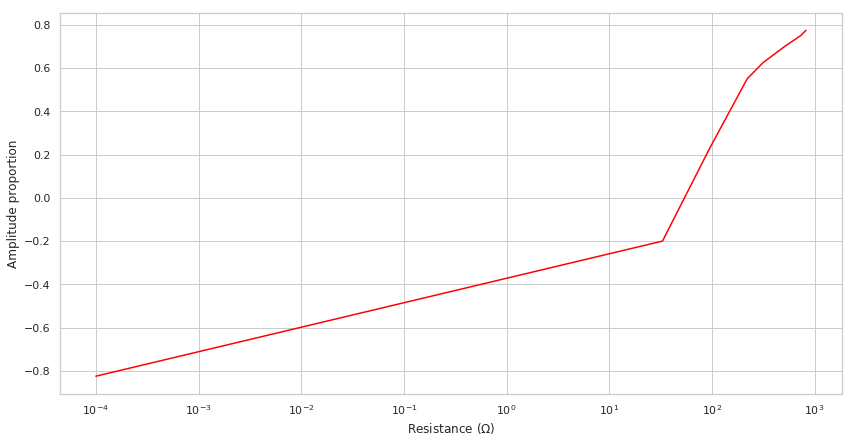

In [84]:
fig, axes = plt.subplots(figsize=(14,7))

axes.plot(ohms, amplits, c='red')

axes.set_xlabel('Resistance ($\Omega$)')
axes.set_ylabel('Amplitude proportion')

axes.set_xscale('log')

plt.show()

In [81]:
popt = np.polyfit(np.log(ohms), amplits, 1)

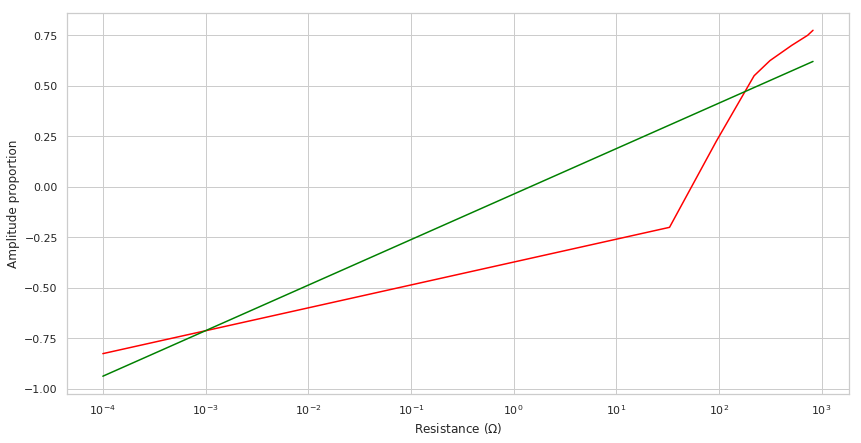

In [83]:
fig, axes = plt.subplots(figsize=(14,7))

axes.plot(ohms, amplits, c='red')
axes.plot(ohms, popt[0]*np.log(ohms) + popt[1], c='green')

axes.set_xlabel('Resistance ($\Omega$)')
axes.set_ylabel('Amplitude proportion')

axes.set_xscale('log')

plt.show()

Az illesztésnél használt modellfüggvény egyenlete $A + B \cdot log(x)$, amely alapján a hullámellenállás **XXX $\pm$ XXX _$\Omega$_** és a veszteségi tényező **XXX $\pm$ XXX** adódik.

## A méréssel kapcsolatos észrevételek

__Kitölteni nem kötelező__: 
* Itt kérjük feltűntetni, hogy mennyi idő volt szükséges a feladatok elvégzéséhez. 
* Itt lehet javaslatot tenni a méréssel kapcsolatban.
* A méréssel kapcsolatban felmerült további ötletek.